In [1]:
from google.colab import files
files.upload()

Saving Hyperparameter-Optimization-master.zip to Hyperparameter-Optimization-master.zip


{'Hyperparameter-Optimization-master.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00@.\xdaN\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00#\x00\t\x00Hyperparameter-Optimization-master/UT\x05\x00\x01\xf8i\x13]PK\x03\x04\n\x00\x00\x00\x08\x00@.\xdaNB\x83\x9bV\x03\x05\x04\x00:s\n\x006\x00\t\x00Hyperparameter-Optimization-master/Churn_Modelling.csvUT\x05\x00\x01\xf8i\x13]t\xfdI\x93\x1bY\x92,\n\xef[\xa4\xff\xc3\xb7\xab\r^\xc8\x99\x87U\x0b\xc9\xccJV\x91L\xf2e\xb2*%{\x87\x88@F\xa0\x03\x01\xf0\x03\x02d\x93\xbf\xfe\xa9\x9a\x9d\xe3\xeepG\xdf\x92{o\r\t\x0f\xf73\xd8\xa4jj\xbf\x1d\xbe\xfdz~\xbe\xdd\x1cWo\xce\xa7\x97\xc3\xf3\xe6\xf8\x8f\xfb\xd5\xef\xe7\xe3~\xfd\xbcY\xbd9n\xee\xb7/\xbf\xdf\x1d\x8e\x9b\xd5/\x9b\xc3\xc3q\xfd\xe5\xf1;\xfe\xdd\xfe\x1e\xff\xfc\xab\x87\xcd\xea\xf3f\x7f\xc6\xff\xf6z\xbd[\xef\xef6+<\xe9\xe3_\x9f\x8e\x87\xfb\xf3\xdd\xcbi\xf5v}zs|\xb3>\xde\xaf\xfeqzu\xf7\xb2\xfd\xba\xf9\xb0\x91\xbf\xf4\xf3\xe9e\xfb\xbc~\xd9\xdc\xff\x8e\xdf\x1d\xbf\xaf~\xfe\xdf-\xfe\xc3\x7f\xfe\x87]\xd9\x98|H\xc6\xe1

In [3]:
from zipfile import ZipFile
filename='/content/Hyperparameter-Optimization-master.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('/content/Hyperparameter-Optimization-master/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

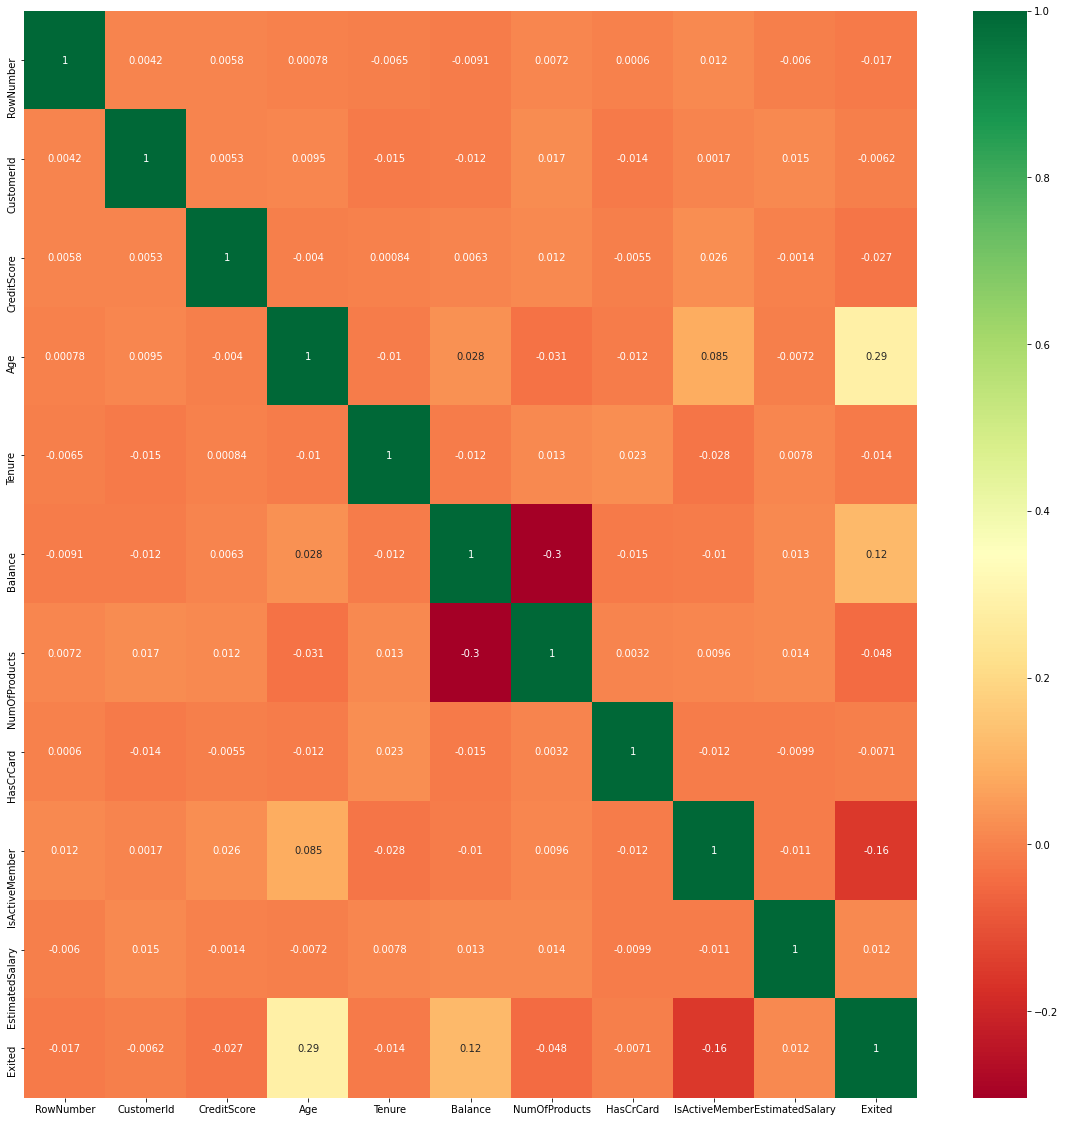

In [9]:
corrmat = df.corr()
tot_corr = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[tot_corr].corr(), annot=True, cmap='RdYlGn')

In [10]:
X=df.iloc[:, 3:-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
y=df.iloc[:,-1:]
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [15]:
X.shape

(10000, 10)

In [31]:
Geography = pd.get_dummies(df['Geography'], drop_first=True)
Geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [32]:
Gender = pd.get_dummies(df['Gender'], drop_first=True)
Gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [34]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [35]:
X=pd.concat([X, Geography, Gender], axis=1)

In [36]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
X_train.shape

(7000, 11)

In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
import xgboost

In [43]:
classifier = xgboost.XGBClassifier()

In [45]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [48]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [49]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   13.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [51]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 3,
 'min_child_weight': 1}

In [52]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score = cross_val_score(classifier, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
score

array([0.872, 0.865, 0.866, 0.867, 0.865, 0.848, 0.868, 0.87 , 0.857,
       0.857])

In [56]:
score.mean()

0.8634999999999999

In [59]:
pd.DataFrame(random_search.predict(X_test)).head()

,0
0,0
1,0
2,0
3,1
4,1
